In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import davies_bouldin_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import DBSCAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pl      300 non-null    float64
 1   pw      300 non-null    float64
 2   sl      300 non-null    float64
 3   sw      300 non-null    float64
 4   id      300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


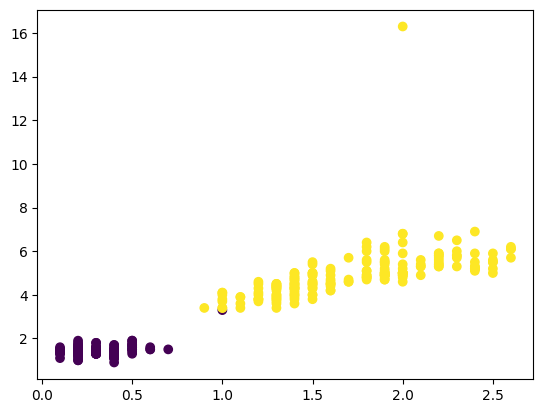

{0: 106, 1: 1, 2: 193}


In [93]:
# Task 0
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data.info()
# TASK 1: k-Means clustering
data = data.drop(columns="id")
kmeans=KMeans(n_clusters=3) 
kmeans.fit(data)

# kmeans.labels_ 
# kmeans.cluster_centers_

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()

unique, counts =np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))

In [94]:
def drop_largest_dist(df: pd.DataFrame, keep=0.95):
    processed_data = df.copy()
    neigh = NearestNeighbors(n_neighbors=3).fit(processed_data)
    df = pd.DataFrame(neigh.kneighbors(processed_data)[0])
    df = df.sum(axis=1)
    processed_data["dist"] = df
    processed_data = processed_data.drop(processed_data.sort_values("dist",ascending=False)[:int(len(processed_data) * (1-keep))].index)
    return processed_data


# preprocessedData1 = data.copy()
# preprocessedData1 = drop_largest_dist(preprocessedData1, keep=0.95)
# print(preprocessedData1)

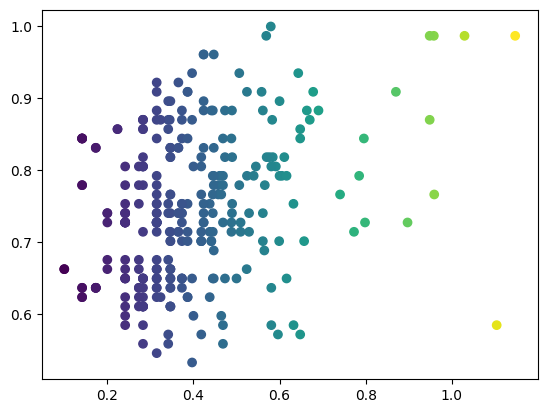

            pl        pw        sl        sw
min   0.532468  0.422222  0.130435  0.038462
max   1.000000  1.000000  1.000000  1.000000
mean  0.746775  0.669809  0.527790  0.469308


In [95]:
# TASK 2: Preprocessing (outlier -> normalization)
preprocessedData1 = data.copy()

preprocessedData1 = drop_largest_dist(preprocessedData1, keep=0.99)
preprocessedData1[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData1[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)


plt.scatter(preprocessedData1["dist"], preprocessedData1["pl"], c=preprocessedData1["dist"], cmap='viridis')
plt.show()

stats = preprocessedData1[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

workingData = preprocessedData1.drop(columns="dist")


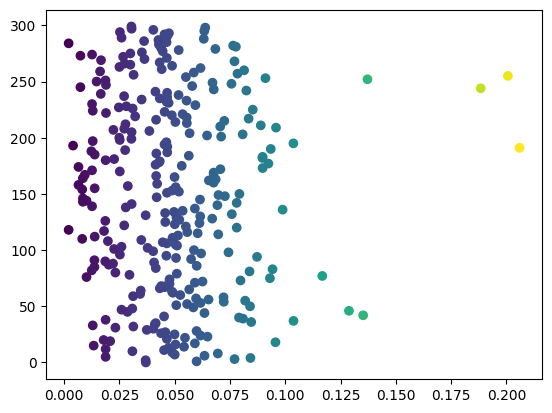

            pl        pw        sl        sw
min   0.082000  0.422222  0.055215  0.038462
max   0.156000  1.000000  0.417178  1.000000
mean  0.115017  0.670707  0.223317  0.468790


In [96]:
# TASK 2: Preprocessing (normalization -> outlier)

preprocessedData2 = data.copy()

preprocessedData2[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData2[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)
preprocessedData2 = drop_largest_dist(preprocessedData2, keep=0.99)


plt.scatter(preprocessedData2["dist"], preprocessedData2.index, c=preprocessedData2["dist"], cmap='viridis')
plt.show()

stats = preprocessedData2[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

[[0.64291899 0.75259259 0.20938578 0.11684982]
 [0.77212478 0.59908362 0.62109667 0.5222046 ]
 [0.83568011 0.65052632 0.78443936 0.8048583 ]]


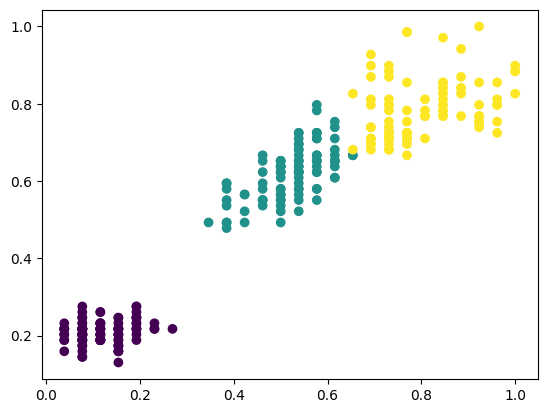

{0: 105, 1: 97, 2: 95}


In [97]:


kmeans=KMeans(n_clusters=3) 
kmeans.fit(workingData)

# kmeans.labels_ 
print(kmeans.cluster_centers_)

plt.scatter(workingData["sw"], workingData["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))



k=2, score: 0.4017492338505025
k=3, score: 0.6639302994573105
k=4, score: 0.8438420411588559
k=5, score: 0.9121489409489583
k=6, score: 1.152845757515015
k=7, score: 1.0268618766143691
k=8, score: 1.1065707592275098
k=9, score: 1.1339310110849992
k=10, score: 1.1356293619835514


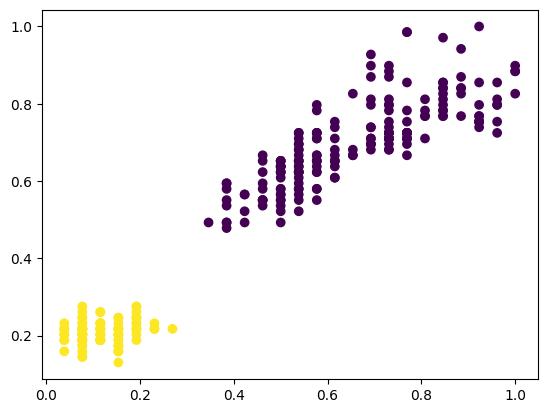

In [98]:
#task 3

ks = range(2,10+1)
for k in ks:
    kmeans=KMeans(n_clusters=k) 
    kmeans.fit(workingData)
    dbs = davies_bouldin_score(workingData, kmeans.labels_)
    print(f"k={k}, score: {dbs}")
k = 2
kmeans=KMeans(n_clusters=k) 
kmeans.fit(workingData)
plt.scatter(workingData["sw"], workingData["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()


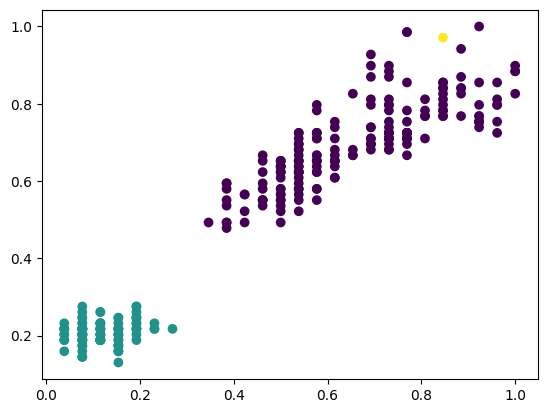

{0: 191, 1: 105, 2: 1}


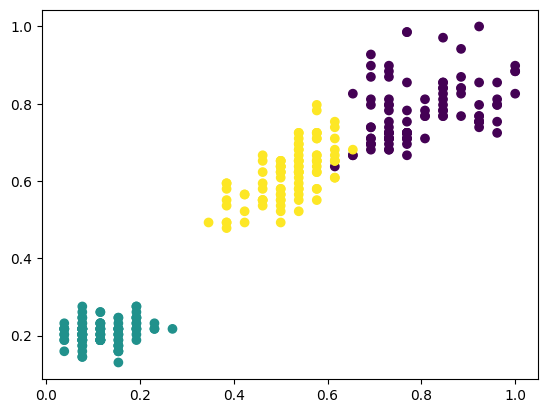

{0: 97, 1: 105, 2: 95}


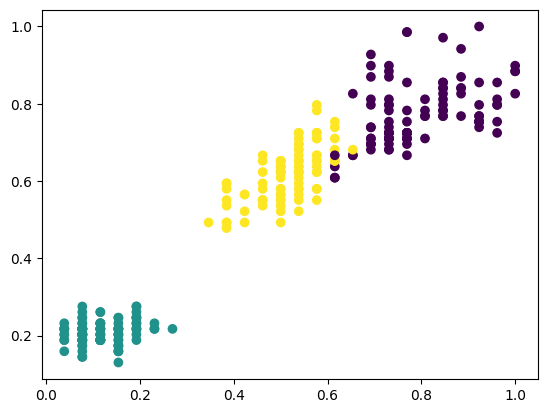

{0: 100, 1: 105, 2: 92}


In [109]:
# Task 4: Hierarchical clustering

agg = AgglomerativeClustering(n_clusters=3, linkage="single")
agg.fit(workingData)

plt.scatter(workingData["sw"], workingData["sl"], c=agg.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(agg.labels_, return_counts=True)
print(dict(zip(unique, counts)))

agg = AgglomerativeClustering(n_clusters=3, linkage="average")
agg.fit(workingData)

plt.scatter(workingData["sw"], workingData["sl"], c=agg.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(agg.labels_, return_counts=True)
print(dict(zip(unique, counts)))

agg = AgglomerativeClustering(n_clusters=3, linkage="complete")
agg.fit(workingData)

plt.scatter(workingData["sw"], workingData["sl"], c=agg.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(agg.labels_, return_counts=True)
print(dict(zip(unique, counts)))


In [100]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

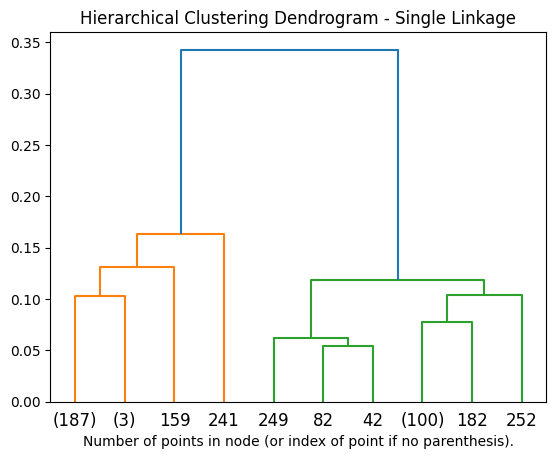

{0: 192, 1: 105}


In [101]:
# Single linkage
agg_single = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="single")
agg_single.fit(workingData)

plt.title("Hierarchical Clustering Dendrogram - Single Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_single, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


agg_single = AgglomerativeClustering(n_clusters=2, linkage="single")
agg_single.fit(workingData)

unique, counts = np.unique(agg_single.labels_, return_counts=True)
print(dict(zip(unique, counts)))


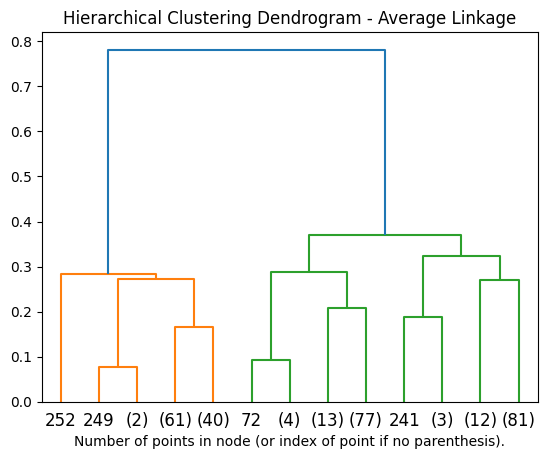

In [102]:
# Average linkage
agg_avg = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="average")
agg_avg.fit(workingData)

plt.title("Hierarchical Clustering Dendrogram - Average Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_avg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

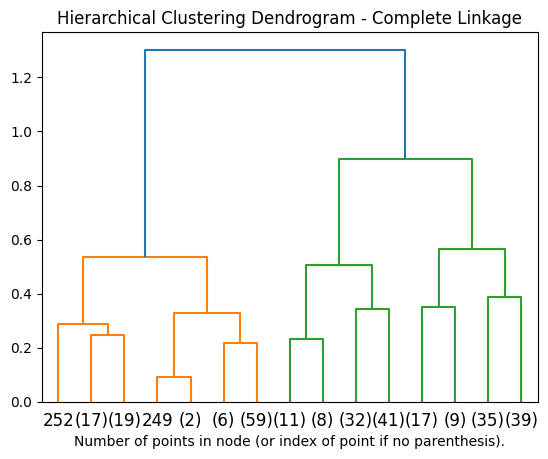

In [103]:
# Complete linkage
agg_comp = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="complete")
agg_comp.fit(workingData)

plt.title("Hierarchical Clustering Dendrogram - Complete Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_comp, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

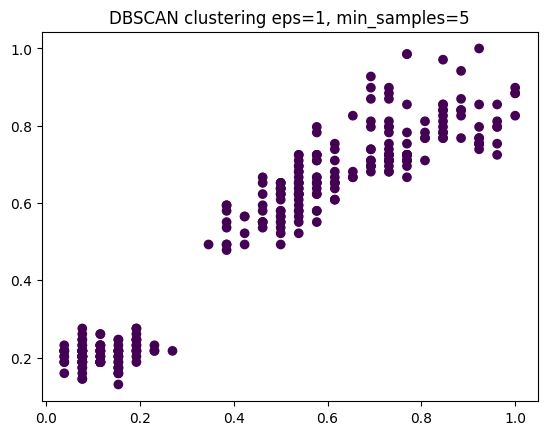

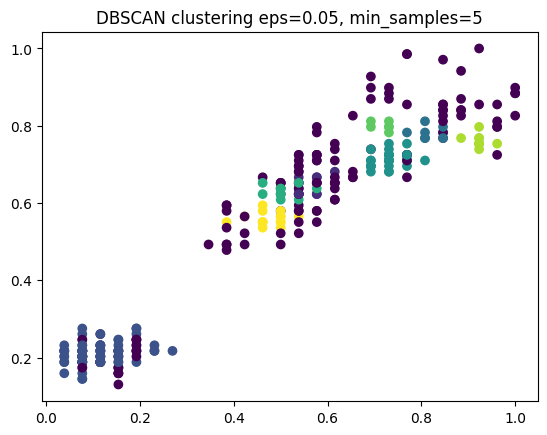

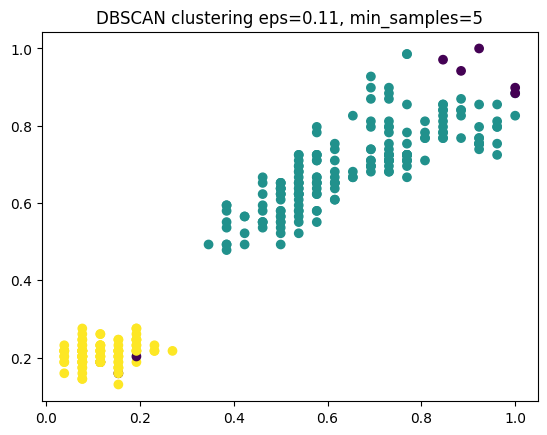

{-1: 8, 0: 187, 1: 102}


In [104]:
# Task 5: DBSCAN
db = DBSCAN(eps=1, min_samples=5)
db.fit(workingData)
plt.title("DBSCAN clustering eps=1, min_samples=5")
plt.scatter(workingData["sw"], workingData["sl"], c=db.labels_, cmap='viridis')
plt.show()

db = DBSCAN(eps=0.05, min_samples=5)
db.fit(workingData)
plt.title("DBSCAN clustering eps=0.05, min_samples=5")
plt.scatter(workingData["sw"], workingData["sl"], c=db.labels_, cmap='viridis')
plt.show()

db = DBSCAN(eps=0.11, min_samples=5)
db.fit(workingData)
plt.title("DBSCAN clustering eps=0.11, min_samples=5")
plt.scatter(workingData["sw"], workingData["sl"], c=db.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(db.labels_, return_counts=True)
print(dict(zip(unique, counts)))

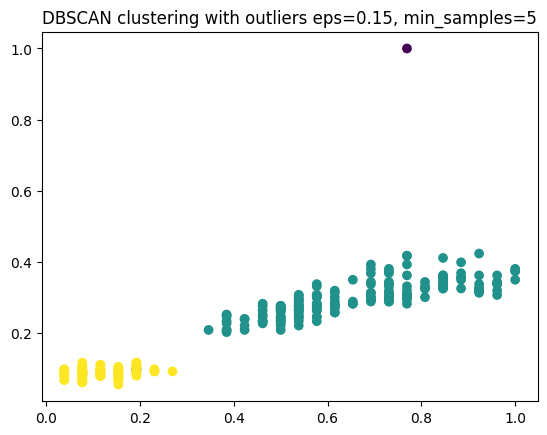

{-1: 2, 0: 193, 1: 105}


In [105]:
normalizedData = data.copy()
normalizedData[['pl', 'pw', 'sl', 'sw']] = normalize(normalizedData[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)

db = DBSCAN(eps=0.15, min_samples=5)
db.fit(normalizedData)
plt.title("DBSCAN clustering with outliers eps=0.15, min_samples=5")
plt.scatter(normalizedData["sw"], normalizedData["sl"], c=db.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(db.labels_, return_counts=True)
print(dict(zip(unique, counts)))

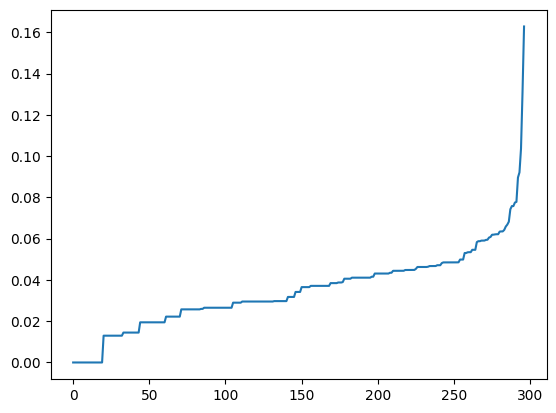

In [127]:
# Plot k-distances (given from assignment)
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(workingData,5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.show()


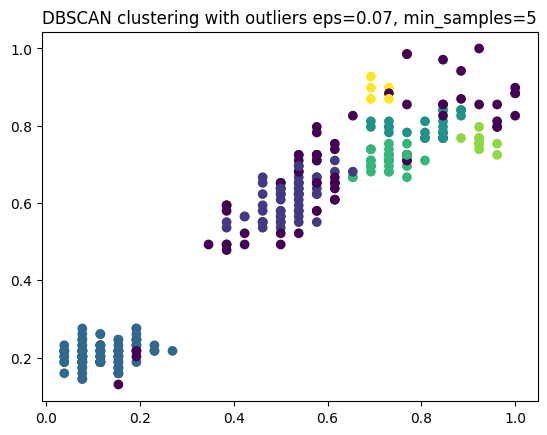

{-1: 66, 0: 63, 1: 96, 2: 21, 3: 35, 4: 11, 5: 5}


In [121]:
db = DBSCAN(eps=0.06, min_samples=5)
db.fit(workingData)
plt.title("DBSCAN clustering with outliers eps=0.07, min_samples=5")
plt.scatter(workingData["sw"], workingData["sl"], c=db.labels_, cmap='viridis')
plt.show()

unique, counts = np.unique(db.labels_, return_counts=True)
print(dict(zip(unique, counts)))